In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/MONEY/TRAIN'
test_path = '/content/drive/MyDrive/MONEY/TEST'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


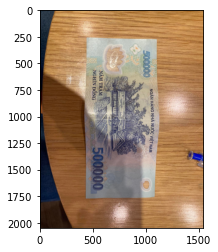

In [ ]:
img = load_img('/content/drive/MyDrive/MONEY/TRAIN/500K/500(1).jpg')
plt.imshow(img)

In [ ]:
DATADIR = '/content/drive/MyDrive/MONEY'

In [ ]:
cv2.imread('/content/drive/MyDrive/MONEY/TRAIN/500K/500(1).jpg').shape

(2048, 1536, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_TRAIN = ImageDataGenerator(rescale=1/255)
X_TEST = ImageDataGenerator(rescale=1/255)

In [ ]:
TRAIN = X_TRAIN.flow_from_directory(directory=r"/content/drive/MyDrive/MONEY/TRAIN",target_size=(300, 150),batch_size=11,class_mode="categorical",color_mode="rgb",)
TEST  = X_TEST.flow_from_directory(directory=r"/content/drive/MyDrive/MONEY/TEST",target_size=(300, 150),batch_size=11,class_mode="categorical",color_mode="rgb",)

Found 1101 images belonging to 11 classes.
Found 359 images belonging to 11 classes.


In [ ]:
TRAIN.class_indices

{'02': 0,
 '05': 1,
 '100K': 2,
 '10K': 3,
 '1K': 4,
 '200K': 5,
 '20K': 6,
 '2K': 7,
 '500K': 8,
 '50K': 9,
 '5K': 10}

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

model=Sequential()
model.add(Conv2D(13,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(300,150,3)))
model.add(Conv2D(4,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(121,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(143,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(121,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 300, 150, 13)      364       
                                                                 
 conv2d_33 (Conv2D)          (None, 300, 150, 4)       472       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 150, 75, 4)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 45000)             0         
                                                                 
 dense_73 (Dense)            (None, 121)               5445121   
                                                                 
 dense_74 (Dense)            (None, 143)               17446     
                                                     

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(TRAIN,epochs=20,batch_size=121,verbose=1,validation_data=TEST)

Epoch 1/20
101/101 [==============================] - 331s 3s/step - loss: 1.1826 - accuracy: 0.6076 - val_loss: 1.7836 - val_accuracy: 0.4011
Epoch 2/20
101/101 [==============================] - 111s 1s/step - loss: 0.2782 - accuracy: 0.8856 - val_loss: 1.6426 - val_accuracy: 0.5404
Epoch 3/20
101/101 [==============================] - 111s 1s/step - loss: 0.1633 - accuracy: 0.9482 - val_loss: 2.1427 - val_accuracy: 0.4930
Epoch 4/20
101/101 [==============================] - 110s 1s/step - loss: 0.0402 - accuracy: 0.9882 - val_loss: 2.2976 - val_accuracy: 0.5292
Epoch 5/20
101/101 [==============================] - 110s 1s/step - loss: 0.0226 - accuracy: 0.9909 - val_loss: 3.0034 - val_accuracy: 0.4345
Epoch 6/20
101/101 [==============================] - 110s 1s/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 2.6109 - val_accuracy: 0.5515
Epoch 7/20
101/101 [==============================] - 110s 1s/step - loss: 9.1811e-04 - accuracy: 1.0000 - val_loss: 2.8295 - val_accuracy: 0.

In [ ]:
model.save('Money.h5')

In [ ]:
score=model.evaluate(TEST,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])

33/33 [==============================] - 33s 1s/step - loss: 3.3403 - accuracy: 0.5515
Test loss= 3.340299129486084
Test accuracy= 0.5515320301055908


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

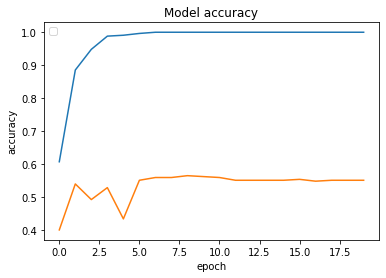

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train','validation',loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
Hello_OPENLAB = load_model('Money.h5')

In [ ]:
labels = {0: '02', 1: '05', 2: '100K', 3: '10K', 4: '1K', 5: '200K', 6: '20K', 7: '2K', 8: '500K', 9: '50K', 10: '5K'}

This is:  200K


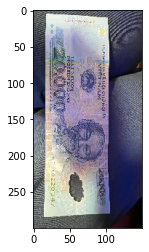

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/1.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  500K


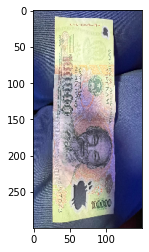

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/2.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  500K


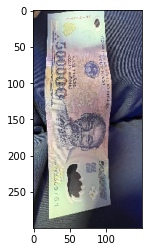

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/3.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  500K


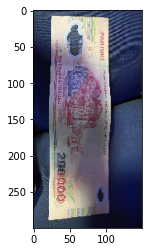

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/4.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  500K


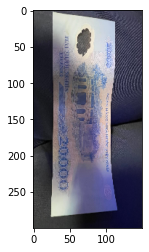

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/5.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  200K


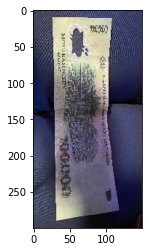

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/6.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  500K


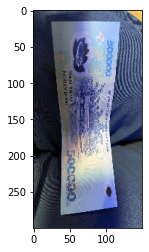

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/7.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  500K


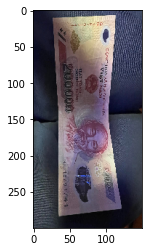

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/8.jpg', target_size =(300,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,150,3)
img = img.astype('float32')
img = img/255
val = Hello_OPENLAB.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])